In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
df=pd.read_csv('https://raw.githubusercontent.com/WidhyaOrg/datasets/master/covid19.csv')
df.head()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30/01/20,Kerala,1,0,0,0
1,2,31/01/20,Kerala,1,0,0,0
2,3,01/02/20,Kerala,2,0,0,0
3,4,02/02/20,Kerala,3,0,0,0
4,5,03/02/20,Kerala,3,0,0,0


Dropping irrelevant feature and grouping all the features by date

In [7]:
df=df.drop('Sno',axis=1)
df.head()
df=df.groupby('Date', sort = False).sum()
df.head()

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
Date,,,,
30/01/20,1,0,0,0
31/01/20,1,0,0,0
01/02/20,2,0,0,0
02/02/20,3,0,0,0
03/02/20,3,0,0,0


In [8]:
#total cases daywise
df['Total_cases'] = df.sum(axis =1).astype('int')
df

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total_cases
Date,,,,,
30/01/20,1,0,0,0,1
31/01/20,1,0,0,0,1
01/02/20,2,0,0,0,2
02/02/20,3,0,0,0,3
03/02/20,3,0,0,0,3
04/02/20,3,0,0,0,3
05/02/20,3,0,0,0,3
06/02/20,3,0,0,0,3
07/02/20,3,0,0,0,3


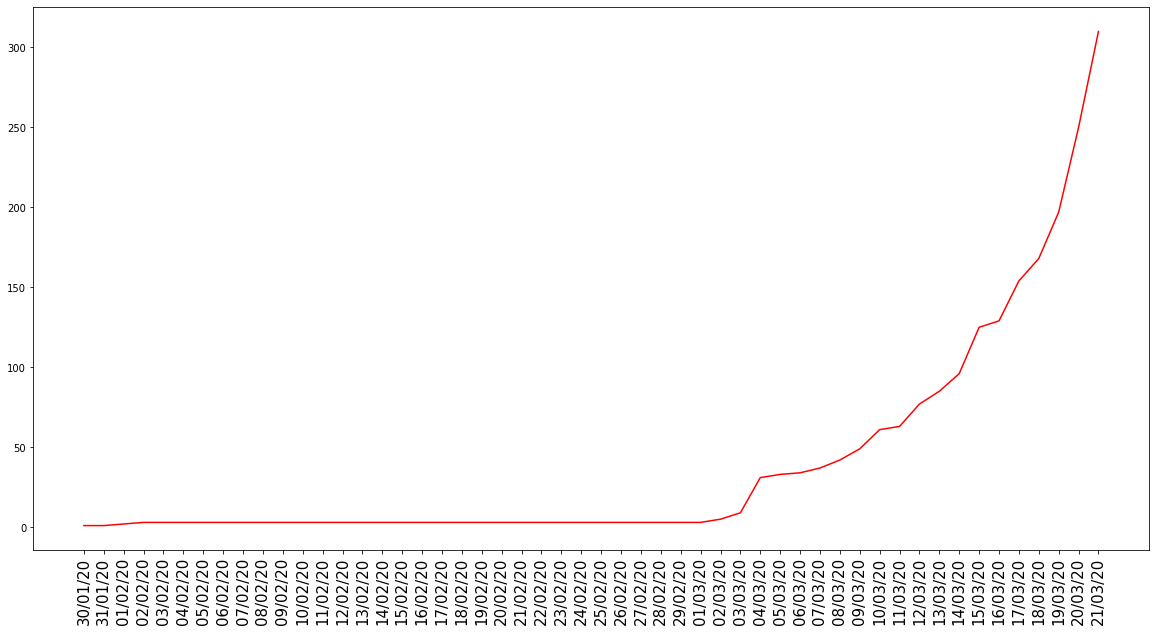

In [9]:
#Visualization of total number of cases and we can see after 3rd march the cases keep increasing day by day
plt.figure(figsize=(20,10))
plt.plot(df.Total_cases,color='r')
plt.xticks(rotation = 90, fontsize = 15)
plt.show()

In [10]:
#Rate of increase of each day
rate=[]
for i in range(0,df.shape[0]-1):
    ratenum=(df['Total_cases'].iloc[i+1]-df['Total_cases'].iloc[i])/df['Total_cases'].iloc[i]
    rate.append(ratenum)

import numpy as np
avg_rate=np.average(rate)
avg_rate

0.15548289717820452

In [11]:
#exponential model
#P_t=P_o*(e^(r*t))
import math 
P_o=31
t=26
P_t=round(P_o*(math.exp(avg_rate*t)))
P_t

1766